In [4]:
%pylab inline


import dlib
import cv2

import os
import tkinter
from tkinter import filedialog

from IPython import display

root = tkinter.Tk()
root.withdraw()


Populating the interactive namespace from numpy and matplotlib


C:\Users\acer\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


''

In [ ]:
imgname = filedialog.askopenfilename(parent=root, initialdir='faces', title='First face...')
face1 = imread(imgname)
#face1.flags['WRITEABLE']=True
#second face
imgname = filedialog.askopenfilename(parent=root, initialdir='faces',
title='Second face...')
face2 = imread(imgname)
#face2.flags['WRITEABLE']=True
#currenly using only 5 landmark
predictor_path = './shape_predictor_5_face_landmarks.dat'
#using trainded 5 faces to extract rich feature vector out of it
face_rec_model_path= './dlib_face_recognition_resnet_model_v1.dat'

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

dets1 = detector(face1, 1)
shape1 = sp(face1, dets1[0])
dets2 = detector(face2, 1)
shape2 = sp(face2, dets2[0])

face_descriptor1 = facerec.compute_face_descriptor(face1, shape1)
face_descriptor2 = facerec.compute_face_descriptor(face2, shape2)

figure(200)
subplot(1,2,1)
imshow(face1)
subplot(1,2,2)
imshow(face2)

euclidean_distance = np.linalg.norm(np.array(face_descriptor1)-np.array(face_descriptor2))

if euclidean_distance<0.6:
    print('Faces match')
else:
    print('Faces are different')

In [3]:
#%pylab notebook

import dlib
import cv2
import os
import tkinter
from tkinter import filedialog
from IPython import display
root = tkinter.Tk()
root.withdraw()
#Go to your working directory (will be different for you)


''

Number of faces detected: 1
Detection 0: Left: 798 Top: 502 Right: 1463 Bottom: 1168
Part 0: (847, 598), Part 1:(848, 686) ...


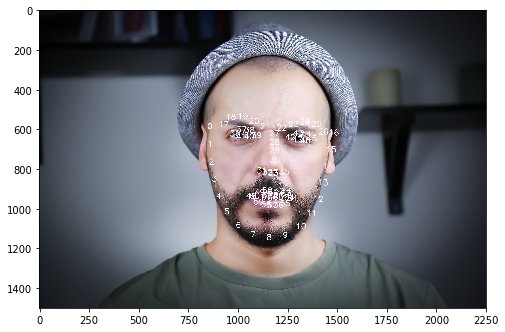

In [8]:
imgname = filedialog.askopenfilename(parent = root,initialdir = os.getcwd(), title = 'Select image file...')
img = imread(imgname)
#img.flags['WRITEABLE']=True

annotated = img.copy()

predictor_path = "./shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()

predictor = dlib.shape_predictor(predictor_path)
font = cv2.FONT_HERSHEY_SIMPLEX

dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(k, d.left(), d.top(), d.right(), d.bottom()))
    shape = predictor(img,d)
    print("Part 0: {}, Part 1:{} ...".format(shape.part(0),shape.part(1)))
    head_width = shape.part(16).x-shape.part(0).y
    fontsize = head_width/650
    
    for pt in range(68):
        x,y = shape.part(pt).x, shape.part(pt).y
        annotated = cv2.putText(annotated, str(pt), (x,y), font, fontsize, (255,255,255),2, cv2.LINE_AA)
    
figure(figsize = (8,6))
imshow(annotated)

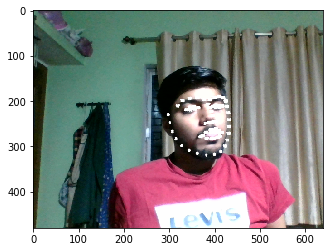

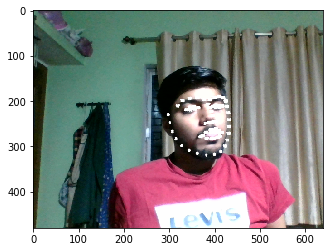

In [18]:
%pylab inline
#%cd /home/test/13293
   
import dlib
import cv2
import os
import tkinter
from tkinter import filedialog
from IPython import display
root = tkinter.Tk()
root.withdraw()

predictor_path = "./shape_predictor_68_face_landmarks.dat" 
detector = dlib.get_frontal_face_detector() 
predictor = dlib.shape_predictor(predictor_path)

cap = cv2.VideoCapture(0)  
#0 is the first camera on your computer, change if you have more #than one camera 

#cap = cv2.VideoCapture('./rollerc.mp4') 

font = cv2.FONT_HERSHEY_SIMPLEX 
while(True): 
   #capture frame-by-frame 
    ret, img = cap.read()
    
    #img.flags['WRITEABLE']=True #just in case

    try: 
       dets = detector(img, 1) 
       shape = predictor(img, dets[0]) 
    except: 
       print('no face detected', end='\r') 
       cap.release() 
       break 

    annotated=img.copy() 
    head_width = shape.part(16).x-shape.part(0).x 
    fontsize = head_width/650 
    for pt in range(68): 
       x,y = shape.part(pt).x, shape.part(pt).y 
       annotated=cv2.putText(annotated, str(pt), (x,y), font, fontsize, (255,255,255),2, cv2.LINE_AA) 
    fig=imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
    
    display.clear_output(wait=True)
    display.display(gcf())
cap.release()
                             